In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
import os

In [2]:
os.chdir(r"c:\Users\lanel\OneDrive\Desktop\Data Analytics info\University of Oregon\UO-Data-Analysis-Project_1\UO-Data-Analysis-Project_1-Video-Game-Marketing\Resources")

current_directory = os.getcwd()

csv_path = os.path.join(current_directory, 'vg_sales_updated.csv')

# Load the CSV file created in Part 1 into a Pandas DataFrame
vg_df = pd.read_csv(csv_path)

# Display sample data
vg_df.head()

,rank,game_title,platform,year,genre,publisher,developer,critic_score,user_score,north_america,europe,japan,rest_of_world,global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90
4,5,Pokémon Red / Green / Blue Version,GB,1998,Role-Playing,Nintendo,Game Freak,9.4,NaN,11.27,8.89,10.22,1.00,31.37


In [3]:
#filter out null values
filtered_df = vg_df[vg_df['critic_score'].notnull()]
filtered_df

,rank,game_title,platform,year,genre,publisher,developer,critic_score,user_score,north_america,europe,japan,rest_of_world,global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90
4,5,Pokémon Red / Green / Blue Version,GB,1998,Role-Playing,Nintendo,Game Freak,9.4,NaN,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,2041,Sea of Thieves,PC,2018,Action-Adventure,Microsoft Studios,Rare Ltd.,6.7,NaN,NaN,NaN,NaN,NaN,NaN
2041,2042,Minecraft,PC,2010,Misc,Mojang,Mojang AB,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2042,2043,Hyrule Warriors: Age of Calamity,NS,2020,Action,Nintendo,Koei Tecmo Games,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2043,2044,Ghost of Tsushima,PS4,2020,Action-Adventure,Sony Interactive Entertainment,Sucker Punch,8.8,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#remove double spaces from Developer and Publisher
filtered_df['publisher'] = filtered_df['publisher'].str.replace('  ', '')
filtered_df['developer'] = filtered_df['developer'].str.replace('  ', '')

C:\Users\lanel\AppData\Local\Temp\ipykernel_15484\1592770088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['publisher'] = filtered_df['publisher'].str.replace('  ', '')
C:\Users\lanel\AppData\Local\Temp\ipykernel_15484\1592770088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['developer'] = filtered_df['developer'].str.replace('  ', '')


In [5]:
#filter out publishers with less than 10 games to gheir name
game_counts_pub = filtered_df['publisher'].value_counts()
game_counts_pub_10 = game_counts_pub[game_counts_pub < 10].reset_index()
less_thatn_10 = game_counts_pub_10["index"].tolist()
filtered_df_pub = filtered_df[filtered_df['publisher'].isin(less_thatn_10) == False]
filtered_df_pub


,rank,game_title,platform,year,genre,publisher,developer,critic_score,user_score,north_america,europe,japan,rest_of_world,global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90
4,5,Pokémon Red / Green / Blue Version,GB,1998,Role-Playing,Nintendo,Game Freak,9.4,NaN,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,2028,Just Cause 2,PC,2010,Action,Eidos Interactive,Avalanche Studios,8.2,NaN,NaN,0.11,NaN,0.02,0.12
2030,2031,"Warhammer 40,000: Dawn of War",PC,2004,Strategy,THQ,Relic,8.8,NaN,0.01,0.04,NaN,0.00,0.05
2036,2037,SimCity 3000,PC,1998,Simulation,Electronic Arts,Maxis,8.5,NaN,NaN,0.00,NaN,0.00,0.00
2037,2038,Half-Life 2: Episode One,PC,2006,Shooter,Electronic Arts,Valve Software,8.7,NaN,NaN,0.00,NaN,0.00,0.00


In [6]:
#repeat for developers
game_counts_dev = filtered_df['developer'].value_counts()
game_counts_dev_10 = game_counts_dev[game_counts_dev < 10].reset_index()
less_thatn_10_dev = game_counts_dev_10["index"].tolist()

filtered_df_dev = filtered_df[filtered_df['developer'].isin(less_thatn_10_dev) == False]


In [7]:
#group by each publisher and find the mean critic score of each
grouped_vg_df_pub = filtered_df_pub.groupby(['publisher'])
grouped_vg_df_pub_mean=grouped_vg_df_pub['critic_score'].mean().reset_index()
grouped_vg_df_pub_mean=grouped_vg_df_pub_mean.sort_values(by='critic_score')
pd.set_option('display.max_rows', None)
grouped_vg_df_pub_mean.set_index("publisher")

,critic_score
publisher,
THQ,7.337209
Sega,7.427273
Warner Bros. Interactive Entertainment,7.520000
LucasArts,7.703846
Konami Digital Entertainment,7.892593
Ubisoft,7.908333
Midway Games,7.910000
Codemasters,8.066667
Electronic Arts,8.081667


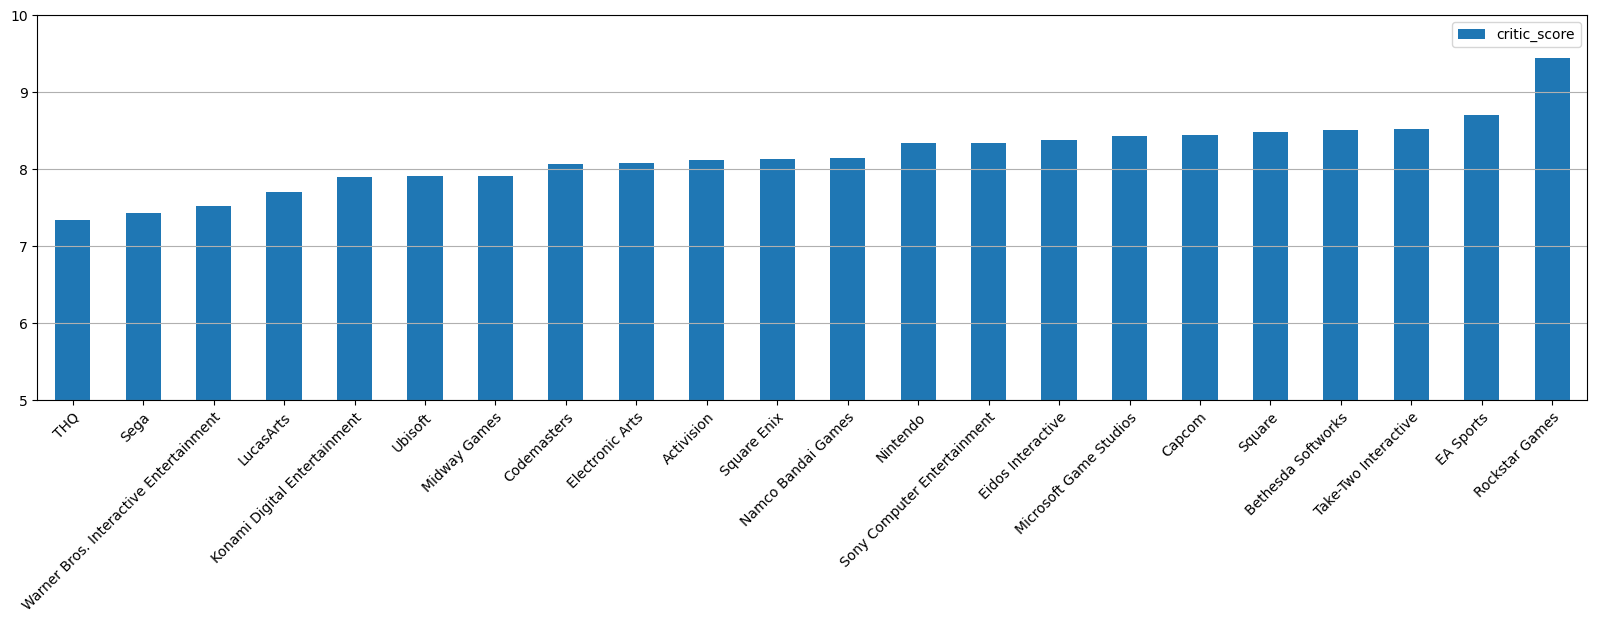

In [8]:
#create bar chart comparing the averate critic review for each publisher
vg_bar_pub = grouped_vg_df_pub_mean.plot(kind = "bar", figsize=(20,5))
vg_bar_pub.set_xticklabels(grouped_vg_df_pub_mean["publisher"], rotation=45, ha='right', rotation_mode='anchor')

plt.ylim([5, 10])
plt.grid(axis = 'y')
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Rockstar Games'),
  Text(1, 0, 'EA Sports'),
  Text(2, 0, 'Bethesda Softworks'),
  Text(3, 0, 'Square'),
  Text(4, 0, 'Take-Two Interactive')])

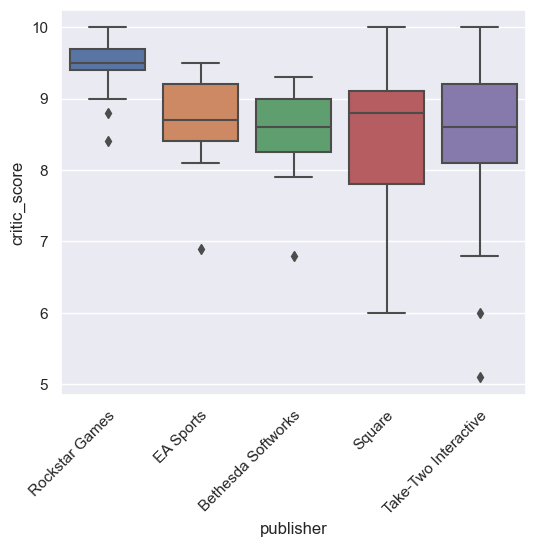

In [9]:
top_5_means = filtered_df[filtered_df["publisher"].isin(['Rockstar Games', 'Bethesda Softworks', 'EA Sports', 'Take-Two Interactive',
                                                                         'Square'])]
sns.set(rc={"figure.figsize":(6, 5)})
outlier_map = sns.boxplot(x="publisher", y="critic_score", data=top_5_means)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

In [10]:
#Go through the same steps above with Developers
grouped_vg_df_dev = filtered_df_dev.groupby(['developer'])
grouped_vg_df_dev_mean=grouped_vg_df_dev['critic_score'].mean().reset_index()
grouped_vg_df_dev_mean=grouped_vg_df_dev_mean.sort_values(by='critic_score')
pd.set_option('display.max_rows', None)
grouped_vg_df_dev_mean.set_index("developer")

,critic_score
developer,
Sonic Team,6.813333
Konami,6.886667
Maxis,6.972727
Sega,7.330769
Traveller's Tales,7.592105
Vicarious Visions,7.750000
Square Enix,7.805556
HAL Laboratory,7.890000
EA Black Box,7.911765


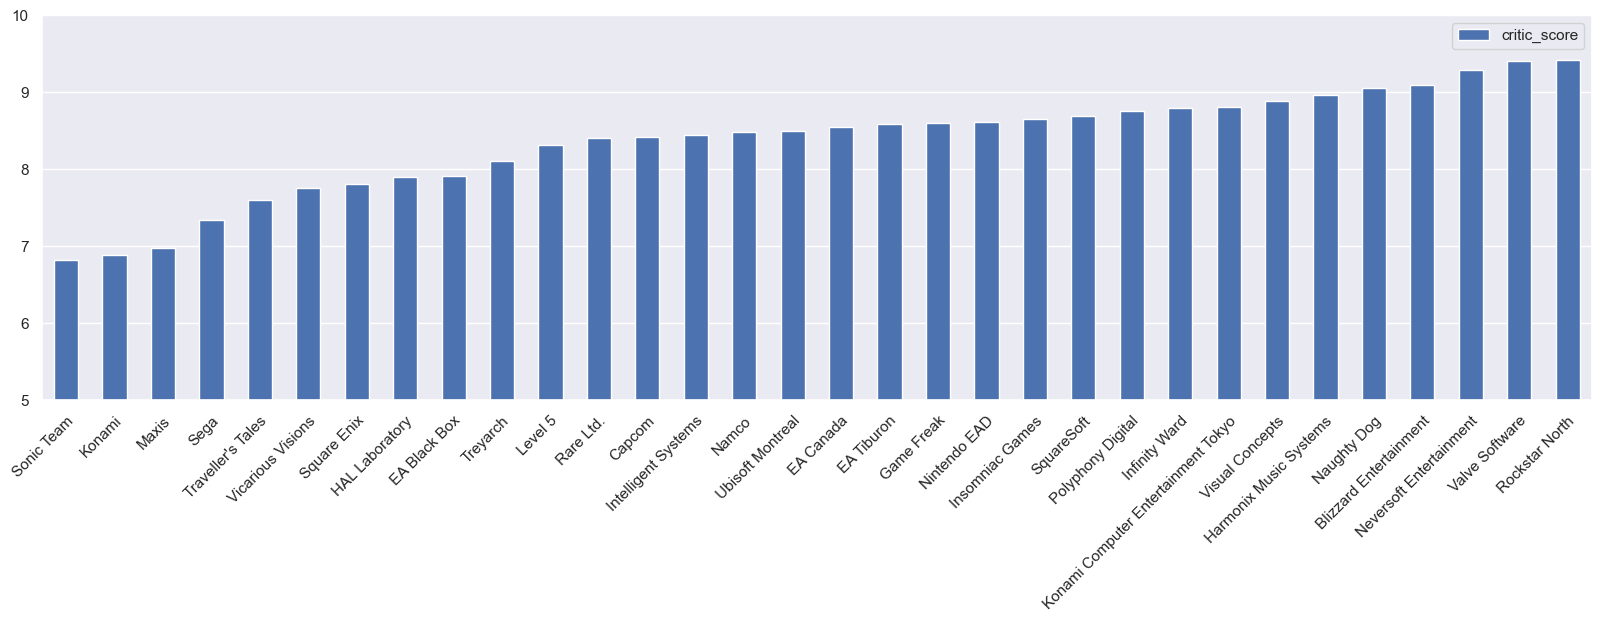

In [11]:
vg_bar_dev = grouped_vg_df_dev_mean.plot(kind = "bar", figsize=(20,5))
vg_bar_dev.set_xticklabels(grouped_vg_df_dev_mean["developer"], rotation=45, ha='right', rotation_mode='anchor')

plt.ylim([5, 10])
plt.grid(axis = 'x')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Rockstar North'),
  Text(1, 0, 'Polyphony Digital'),
  Text(2, 0, 'Infinity Ward'),
  Text(3, 0, 'Naughty Dog'),
  Text(4, 0, 'Blizzard Entertainment'),
  Text(5, 0, 'Harmonix Music Systems'),
  Text(6, 0, 'Neversoft Entertainment'),
  Text(7, 0, 'Konami Computer Entertainment Tokyo'),
  Text(8, 0, 'Valve Software'),
  Text(9, 0, 'Visual Concepts')])

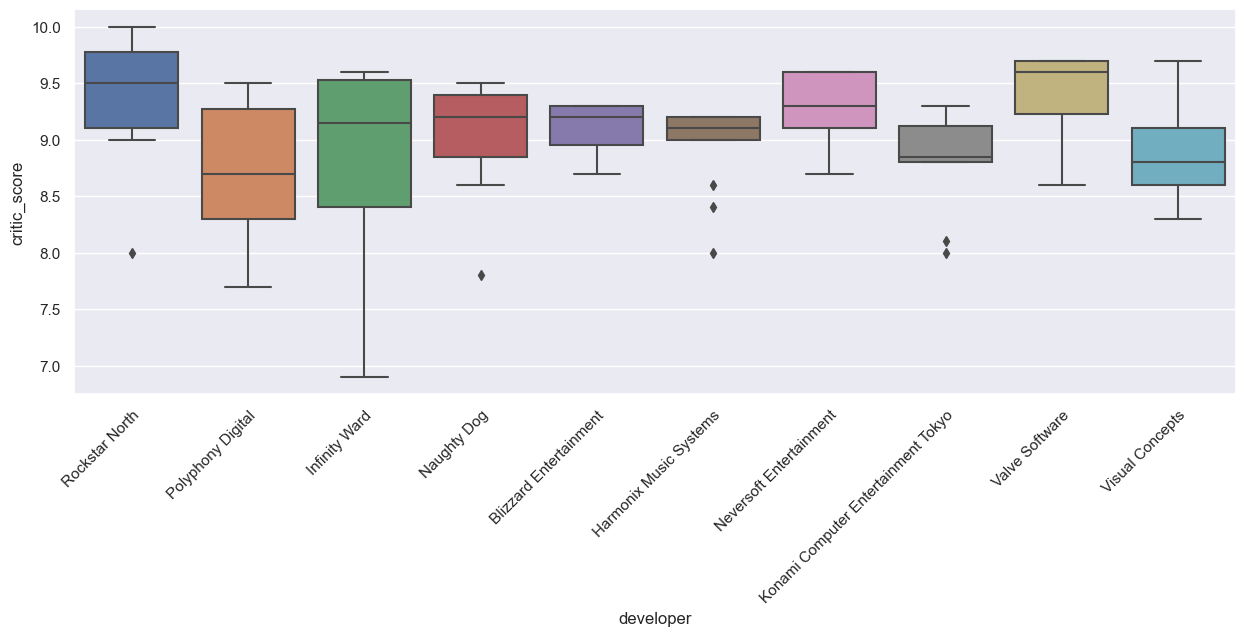

In [12]:
top_10_means = filtered_df[filtered_df["developer"].isin(['Rockstar North', 'Valve Software', 'Neversoft Entertainment', 'Blizzard Entertainment',
                                                                         'Naughty Dog', 'Harmonix Music Systems', 'Visual Concepts', 'Konami Computer Entertainment Tokyo',
                                                                         'Infinity Ward', 'Polyphony Digital'])]
sns.set(rc={"figure.figsize":(15, 5)})
outlier_map = sns.boxplot(x="developer", y="critic_score", data=top_10_means)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')